# Lecture 15 - Correlation
## (does not imply causation)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Announcements:
* Data Ethics 3 discussion Wednesday, writeup due by the start of class.
* I forgot to quiz you on merge/melt/pivot last Friday, so please be prepared for that to show up on this Friday's quiz.
* Lab 6 is not posted yet =[
  * The plan is to have you collect, curate, and explore/analyze your own dataset.
  * The pre-lab task is to come up with 2-3 candidate topics and collection strategies. You don't need to collect data yet, but convince yourself that:
    * (1) The data can be collected, curated, and cleaned; collection and preprocessing should be more involved than downloading a CSV
    * (2) There will be something "there" to analyze; you can go in with a question in mind or go in blind, but the data should be interesting enough that you'll find a story to tell.
#### Goals:
* Understand the distinction between correlation and causation, and be wary of the dangers of assuming that correlation implies causation.
* Know the definition and have an intuition for the meaning of the Pearson Correlation Coefficient and the Spearman Rank Correlation Coefficient, the differences between them, and when to use each.

## Correlation (does not imply causation)

What do we mean by correlation?

So far, an informal definition: Variables are correlated if one **appears to predict** the other, or if an increase or decrease in one is **consistently associated with** an increase or decrease in the other.

In [69]:
import pandas as pd
import seaborn as sns
data_url = "https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/data/NHANES/NHANES.csv"
cols_renamed = {"SEQN": "SEQN",
                "RIAGENDR": "Gender", # 1 = M, 2 = F
                "RIDAGEYR": "Age", # years
                "BMXWT": "Weight", # kg
                "BMXHT": "Height", # cm
                 "BMXLEG": "Leg", # cm
                "BMXARML": "Arm", # cm
                "BMXARMC": "Arm Cir", # cm
                "BMXWAIST": "Waist Cir"} # cm

bm = pd.read_csv(data_url)
bm = bm.rename(cols_renamed, axis='columns')
bm = bm.drop("SEQN", axis='columns')
bm = bm[bm["Age"] >= 21]

There seems to be a pretty strong correlation between height and leg length:

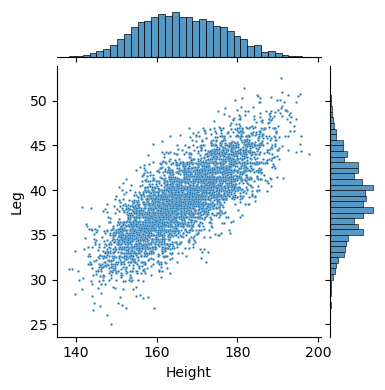

In [70]:
sns.jointplot(x="Height", y="Leg", data=bm, s=3, height=4)

Not as much between height and arm circumference - maybe a little upward trend, if you squint?

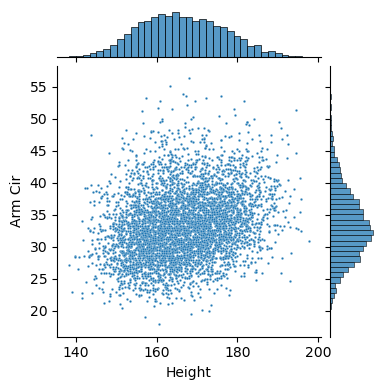

In [71]:
sns.jointplot(x="Height", y="Arm Cir", data=bm, s=3, height=4)

Really hard to see much of a correlation between age and weight:

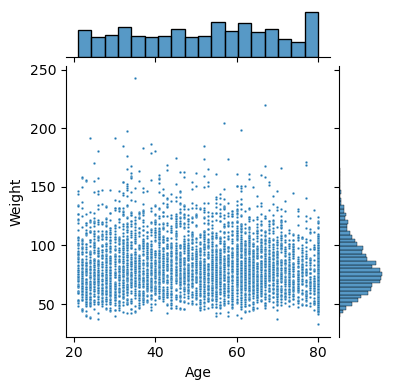

In [72]:
sns.jointplot(x="Age", y="Weight", data=bm, s=3, height=4)

It kind of looks like there's a slight negative correlation here between age and arm circumference?

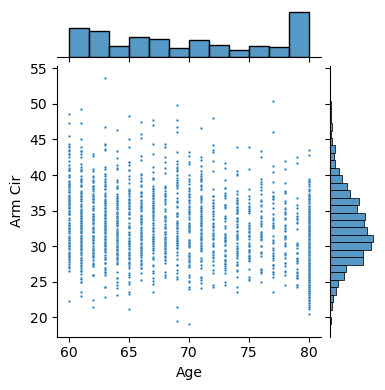

In [73]:
sns.jointplot(x="Age", y="Arm Cir", data=bm[bm["Age"] >= 60], s=3, height=4)

Variables are correlated if one **appears to predict** the other, or if an increase or decrease in one is **consistently associated with** an increase or decrease in the other.

# Measuring Correlation

We'd like a number (a statistic, really) that captures the *degree* of correlation between two variables.

Here's one such statistic, called the **Pearson Correlation Coefficient**:
$$r(X, Y) = \frac{\sum_{i=1}^n (X_i - \bar{X}) (Y_i - \bar{Y})}
                  {\sqrt{\sum_{i=1}^n (X_i-\bar{X})^2}\sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}}$$
                  
where $\bar{X}$ and $\bar{Y}$ are the means $X$ and $Y$, respectively.

On the one hand, yikes! On the other hand, this is made of mostly things we've seen before. Notice that the denominator is the product of the two variables' standard deviations!
$$r(X, Y) = \frac{\sum_{i=1}^n (X_i - \bar{X}) (Y_i - \bar{Y})}
                  {\sigma(X) \sigma(Y)}$$
                 
And the numerator is... well, it's sort of like a variance, except instead of squaring the distance of one varaible to its mean, we multiply $X_i$'s distance from the mean by $Y_i$'s distance from the mean. This is a nifty enough thing that it also has its own name: *covariance*. So we can equivalently write 

$$r(X, Y) = \frac{\mathrm{Cov}(X,Y)}{\sigma(X) \sigma(Y)}$$

>*Note*: You might notice that the denominators are not quite standard deviations: they're missing the $1/(n-1)$ normalizer. Covariance alone is also usually defined with a $1/(n-1)$, but by leaving it out on the top and bottom we get the same result because the $1/(n-1)$s would cancel each other out.

Of course pandas has a function to calculate $r$ for you:

In [74]:
bm["Height"].corr(bm["Leg"]) # pandas

np.float64(0.7887364110516858)

You can also just compute *all* the correlations among all columns of a dataframe:

In [75]:
bm.corr() # pandas-er

Gender       Age    Weight    Height       Leg       Arm  \
Gender     1.000000 -0.024645 -0.245535 -0.680140 -0.546402 -0.556222   
Age       -0.024645  1.000000 -0.080169 -0.140594 -0.264969  0.019138   
Weight    -0.245535 -0.080169  1.000000  0.446089  0.334135  0.566939   
Height    -0.680140 -0.140594  0.446089  1.000000  0.788736  0.803174   
Leg       -0.546402 -0.264969  0.334135  0.788736  1.000000  0.653224   
Arm       -0.556222  0.019138  0.566939  0.803174  0.653224  1.000000   
Arm Cir   -0.153541 -0.123960  0.891091  0.262247  0.207673  0.432323   
Waist Cir -0.112250  0.144533  0.896244  0.201539  0.063750  0.397757   

            Arm Cir  Waist Cir  
Gender    -0.153541  -0.112250  
Age       -0.123960   0.144533  
Weight     0.891091   0.896244  
Height     0.262247   0.201539  
Leg        0.207673   0.063750  
Arm        0.432323   0.397757  
Arm Cir    1.000000   0.809686  
Waist Cir  0.809686   1.000000

In [76]:
def corrplot(c1, c2, df, sz=1):
    r = df[c1].corr(df[c2]) # Pearson
    sns.lmplot(x=c1, y=c2, data=df, height=4, scatter_kws={'s': sz}).set(title=f"Pearson r= {r:.02}")

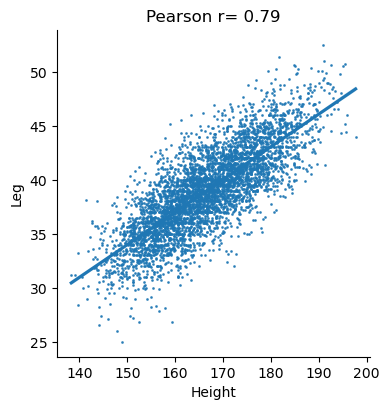

In [77]:
corrplot("Height", "Leg", bm)

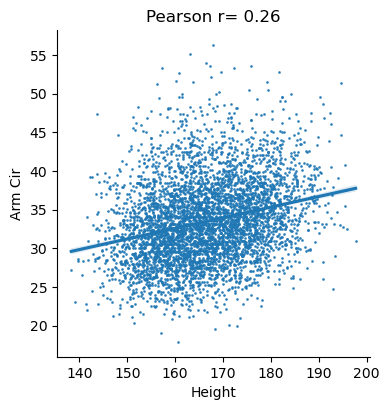

In [78]:
corrplot("Height", "Arm Cir", bm)

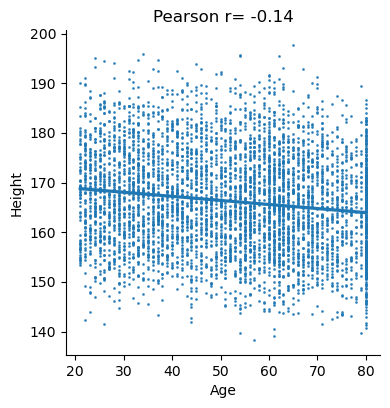

In [79]:
corrplot("Age", "Height", bm)

### Two variables are correlated. What does that tell us?

Suppose you open up a dataset, make a `jointplot` and find that two variables A and B are highly correlated. Without knowing any more than that, what might have given rise to this correlation?

A is liquid precip per minute, B is number of people wearing raincoats.

What happened? 

**A caused B**

-----

A is a measure of lung health; B is number of cigarettes smoked per day.

What happened? 

**B caused A**

-----

**A** is the ranking of the college a person graduated from; **B** is their score on the GRE (an SAT-like exam sometimes used for graduate school admissions).

What happened? 

(C, D, E, F, Z) caused A and B

-----

A is height in centimeters; B is height in feet

What happened? 

**A is B**


-----

**A** is the cost to send a letter via the USPS; **B** is the number of Google searches for 'i am dizzy'.

What happened?

If you look at how enough things vary, many of them will line up.

---

![](https://www.tylervigen.com/spurious/correlation/image/2607_cost-to-send-a-letter-via-the-usps_correlates-with_google-searches-for-i-am-dizzy.svg)

![](https://imgs.xkcd.com/comics/firefox_wicca.png)

More (real) examples: https://www.tylervigen.com/spurious-correlations

### In seriousness:

It's easy to find ridiculous correlations that are obviously not causal and have a good laugh about it.

It's **still** easy to see correlation and jump to the conclusion that there is a causation at work, (even if you understand intellectually that correlation does not imply causation!)

It's also vastly easier to find correlations than to prove causation - this is a big part of what makes science hard.

A fun activity: google "[study finds link](https://www.google.com/search?q=study+finds+link)" and look at some of the news articles that result.

From my [second result](https://www.news-medical.net/news/20210910/Study-finds-link-between-physically-active-lifestyle-and-lower-risk-of-anxiety.aspx), way down the page:
> \[The scientists\] added that randomized intervention trials, as well as long-term objective measurements of physical activity in prospective studies, are also needed to **assess the validity and causality of the association they reported**.

![](https://imgs.xkcd.com/comics/correlation.png)
Title text: "Correlation doesn't imply causation, but it does waggle its eyebrows suggestively and gesture furtively while mouthing 'look over there'."

### Some notable properties of Pearson's $r$

Let's look at a synthetic example to make a couple points here:


In [80]:
import numpy as np
df = pd.DataFrame()

In [81]:
def corrplot(c1, c2, df, sz=1):
    r = df[c1].corr(df[c2]) # Pearson
    p = df[c1].corr(df[c2], method="spearman")
    sns.lmplot(x=c1, y=c2, data=df, height=4, scatter_kws={'s': sz}).set(title=f"Pearson r= {r:.02}; Spearman p = {p:.02}")

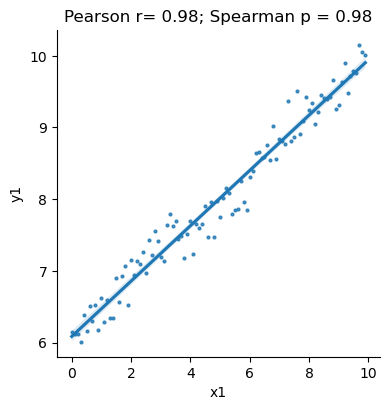

In [82]:
x1 = np.arange(0, 10, .1)
y_ideal = np.arange(6, 10, 0.04)
noise = np.random.randn(*y_ideal.shape) * .2
y1 = y_ideal + noise
df["x1"] = x1
df["y1"] = y1
corrplot("x1", "y1", df, sz=4)

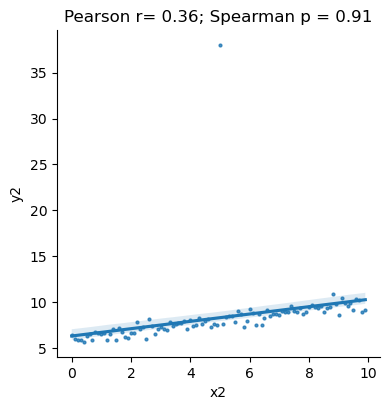

In [83]:
x2 = np.arange(0, 10, .1)
y2_ideal = np.arange(6, 10, 0.04)
y2_ideal[50] = 38
noise2 = np.random.randn(*y2_ideal.shape) * .5
y2 = y2_ideal + noise2
df["x2"] = x2
df["y2"] = y2
corrplot("x2", "y2", df, sz=4)

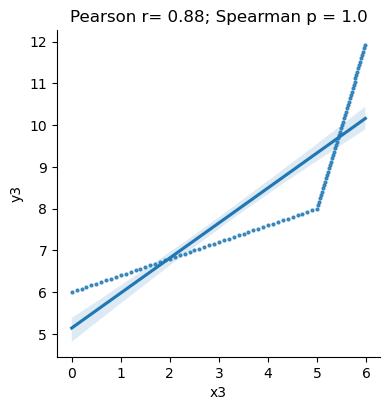

In [84]:
x3 = np.concatenate((np.arange(0, 5, .1), np.arange(5, 6, 0.02)))
y3 = np.concatenate((np.arange(6, 8, 0.04), np.arange(8, 12, 0.08)))
df["x3"] = x3
df["y3"] = y3
corrplot("x3", "y3", df, sz=4)

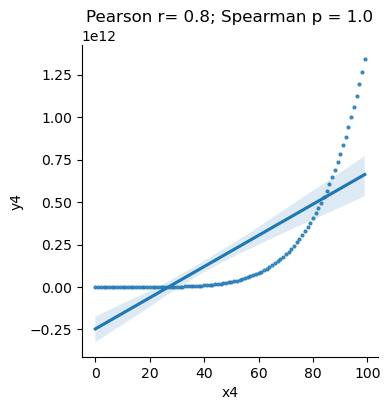

In [85]:
x4 = np.arange(0, 100)
y4 = np.arange(6, 106)**6
df["x4"] = x4
df["y4"] = y4
corrplot("x4", "y4", df, sz=4)

#### Two observations:
* Pearson measures the strength of a **linear** relationship
* Outliers have an outsided effect on $r$.

### Spearman 
Another measure of correlation that is less susceptible to these is called the **Spearman Rank Correlation Coefficient**.

The intuition is to look at the *relative* positioning of a value of $x$ within its fellow $x$s and see how that compares to the corresponding $y$'s position among $y$s. Let $rank(x_i)$ be the position of $x_i$ in sorted order (i.e., 1st for the smallest, $n$ for the largest). Then if the $x$'s and $y$'s are perfectly "rank-correlated", then $rank(x_i)$ will equal $rank(y_i)$ for all $i$. A measure of how far the dataset deviates from this ideal is:
$$\rho = 1 - \frac{6 \sum_{i=1}^n (rank(x_i) - rank(y_i))^2}{n(n^2-1)}$$

The details of this formula aren't too interesting; the factor of 6 in the numerator and the entire denominator are just there to make the sure the reusult lies in the range from -1 to 1.